# Exploring Text Data
### Table of Contents
1. About the Dataset
2. Generating Word Frequency
3. EDA using Word Clouds
4. Text Cleaning

## 1. About the Dataset

In [1]:
import pandas as pd

#Load the dataset
df = pd.read_csv('./data/tweets.csv', encoding = 'ISO-8859-1')

In [2]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=&gt; (5157, 14)


In [3]:
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


## 2. Generating Word Frequency

In [4]:
import spacy

In [5]:
# Loading model
nlp=spacy.load('en_core_web_sm')

In [6]:
# Combining tweets into a single string
combined_tweets=' '.join(df.text.values)

In [7]:
# Creating Doc object
doc=nlp(combined_tweets)

In [8]:
# Function for generating word frequency
def gen_freq(tokens):
    
    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    
    # Printing frequencies
    print(word_freq[:20])
    
    return word_freq

In [9]:
# Getting word frequency
word_freq=gen_freq(doc)

#                 5770
demonetization    2523
.                 2318
:                 2048
Demonetization    2003
,                 1735
to                1659
                 1642
the               1593
of                1588
RT                1371
in                1343
\r\n              1288
is                1088
on                 946
a                  816
?                  723
and                711
India              685
&#39;s                 664
dtype: int64


## 3. EDA using Word Clouds
**Note:-** You can install `WordCloud` library by - 

`pip install wordcloud`

In [10]:
#Importing libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data)
    
    # Setting Figure Size
    plt.figure(figsize=(14,12))
    
    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')
    
    # Removing all the axes
    plt.axis("off")
    
    plt.show()

In [12]:
print('No. of unique words=>',len(word_freq))

No. of unique words=&gt; 16559


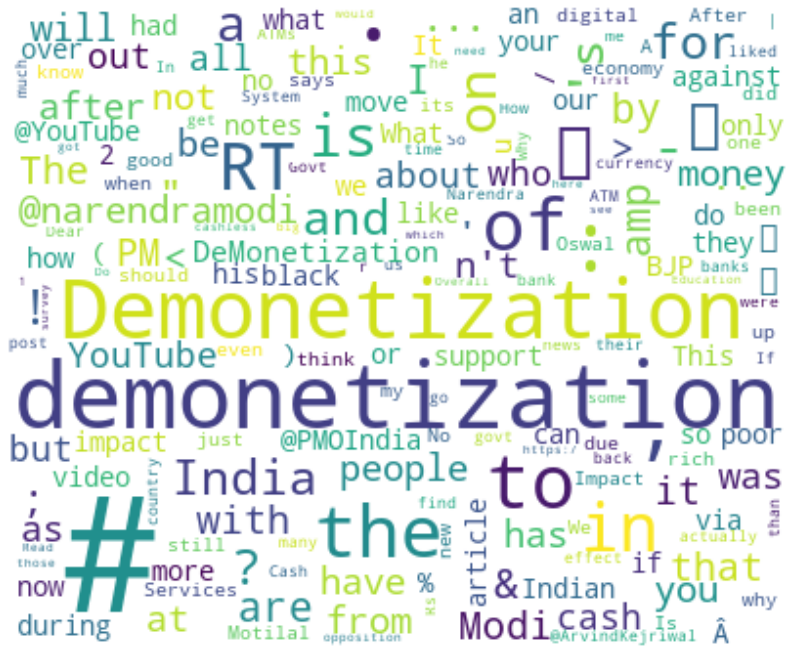

In [13]:
# Generating wordcloud
generate_wordcloud(word_freq)

## 4. Text Cleaning - Part-1

In [14]:
import re

In [15]:
# Removing RT and # from tweets
combined_tweets=re.sub('(RT|#)','',combined_tweets)

In [16]:
# Lowercasing the text
combined_tweets=combined_tweets.lower()

In [17]:
# Creating Doc object
doc=nlp(combined_tweets)

In [18]:
# Removing stopwords and punctuations
tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [19]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4776
                  1626
                 1358
\r\n              1286
india              731
amp                438
modi               402
&gt;                  363
&lt;                  352
@narendramodi      328
money              324
people             318
\r\n\r\n           314
pm                 286
                  284
cash               283
youtube            255
impact             186
like               163
black              163
dtype: int64


In [20]:
print('No. of unique words=>',len(word_freq))

No. of unique words=&gt; 14386


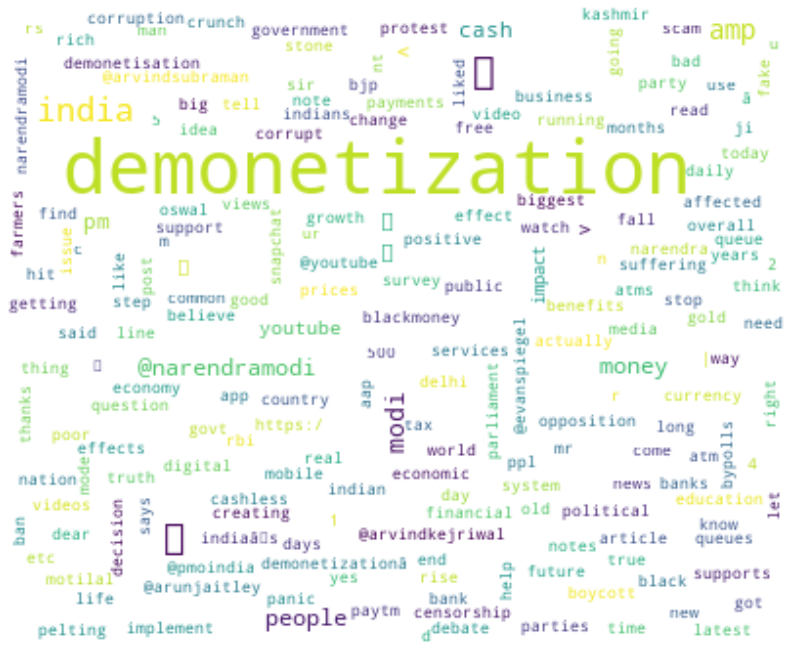

In [21]:
# Generating wordcloud
generate_wordcloud(word_freq)

## Text Cleaning - Part-2

In [22]:
#tokens

In [23]:
# Combining tokens into a text
combined_tweets=' '.join([token.text for token in tokens])

In [24]:
# Removing "\r\n", "amp", "<", ">" from the text
combined_tweets=re.sub('(\r\n|amp|<|>)+','',combined_tweets)

In [25]:
# Creating Doc object
doc=nlp(combined_tweets)

In [26]:
# Removing whitespaces
tokens=[token for token in doc if (token.is_space==False)]

In [27]:
# Getting word frequencies
word_freq=gen_freq(tokens)

demonetization    4780
india              731
modi               402
@narendramodi      328
money              325
people             318
pm                 287
cash               283
youtube            255
impact             186
like               163
black              163
digital            153
@youtube           149
support            146
govt               133
u                  127
bjp                127
poor               123
notes              120
dtype: int64


In [28]:
print('No. of unique words=>',len(word_freq))

No. of unique words=&gt; 14352


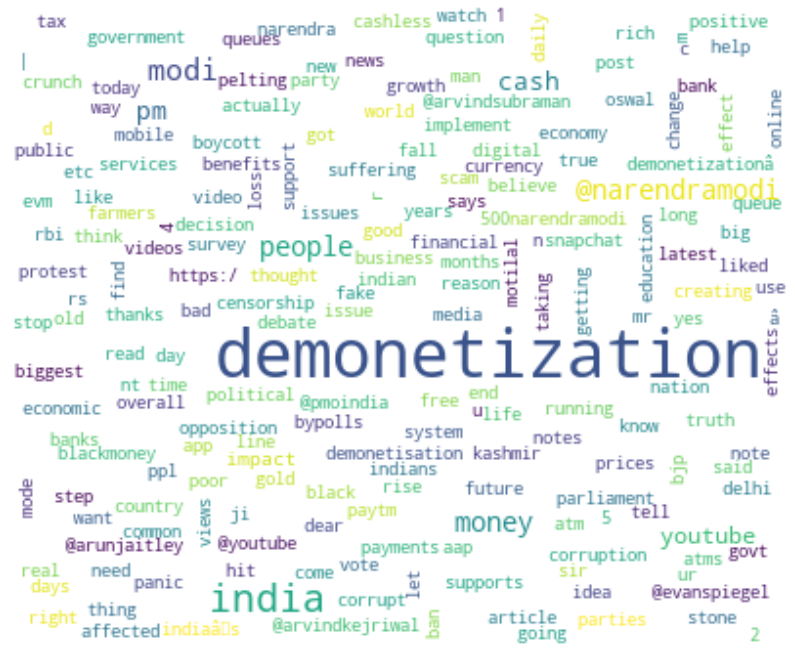

In [29]:
# Generating wordcloud
generate_wordcloud(word_freq)

# Exercise 

### Remove @ , numbers and https://

In [30]:
#tokens

In [31]:
combined_tweets = ' '.join ([token.text  for token in tokens])

In [32]:
#Remove https://
combined_tweets = re.sub('https?://\S+', '',combined_tweets)

In [33]:
#combined_tweets

In [34]:
#Remove digits
combined_tweets = re.sub('[\d|_]','',combined_tweets)

In [35]:
#combined_tweets

In [36]:
# Remove User Mentions @
combined_tweets = re.sub('(@[A-Za-z0–9]+)' ,'',combined_tweets)

In [37]:
combined_tweets

e fault adverts leaving demonetization effect double whammy iip index industrial production contracts . cpi consumer price index rises . sonu nigam reaction demonetization   .    exclusive research global waroncash indian perspeâ  yes reason bjp win demonetization disaster rigging save modi punjab rigging protect staâ   modi genuine fans good work lpg electrification demonetization yemen rescue toilets hackathon etc youtube demonetization patreon vlog update      firse try karo type child trafficking demonetization search query edu+au+bdedu+bu+  sir analysis judging debate demonetization post elections promised ndtv share thank    sorry bro serve job company demonetizatioâ    government successful initiative child trafficking biz broken post demonetization  tonight free webinar  pm indian economy focus supply reforms including demonetization httpâ  investor jim rogers says avoid india buy russia  emergingmarket $ rsx currency demonetization â        demonetization class action begin in

In [38]:
doc = nlp(combined_tweets)

In [39]:
tokens=[token for token in doc if (token.is_space==False)]

In [40]:
tokens

[critical,
 question,
 paytm,
 informed,
 demonetization,
 edict,
 pm,
 clearly,
 fishy,
 requires,
 disclosure,
 ;,
 â,
 vote,
 demonetization,
 modi,
 survey,
 app,
 finsec,
 rbi,
 dy,
 governor,
 cbdt,
 chair,
 +,
 harvard,
 professor,
 lambaste,
 demonetization,
 aam,
 aadmi,
 listen,
 thâ,
 gurugram,
 haryana,
 post,
 office,
 employees,
 provide,
 cash,
 exchange,
 patients,
 hospitals,
 demonetization,
 reddy,
 wedding,
 cartoon,
 demonetization,
 reddywedding,
 indiaâs,
 demonetization,
 blackmoney,
 symptom,
 disease,
 rs,
 lakh,
 looted,
 bank,
 kishtwar,
 j&amp;;k,
 incident,
 demonetization,
 terrorists,
 haveâ,
 calling,
 nationalists,
 join,
 walk,
 corruptionfreeindia,
 spread,
 benefits,
 demonetization,
 masâ,
 opposition,
 leaders,
 demonetization,
 respect,
 decision,
 support,
 oppositioâ,
 national,
 reform,
 destroyed,
 essence,
 sagan,
 instances,
 urge,
 giving,
 demonetization,
 second,
 thoughâ,
 opposition,
 leaders,
 demonetization,
 respect,
 decision,
 su

In [41]:
word_freq = gen_freq(tokens)

demonetization    4783
india              732
modi               402
money              325
people             319
pm                 288
cash               283
youtube            255
â                  224
impact             186
black              163
like               163
digital            153
support            146
govt               133
u                  127
bjp                127
.                  124
poor               123
notes              122
dtype: int64


In [42]:
print('No. of unique words=>',len(word_freq))

No. of unique words=&gt; 9035


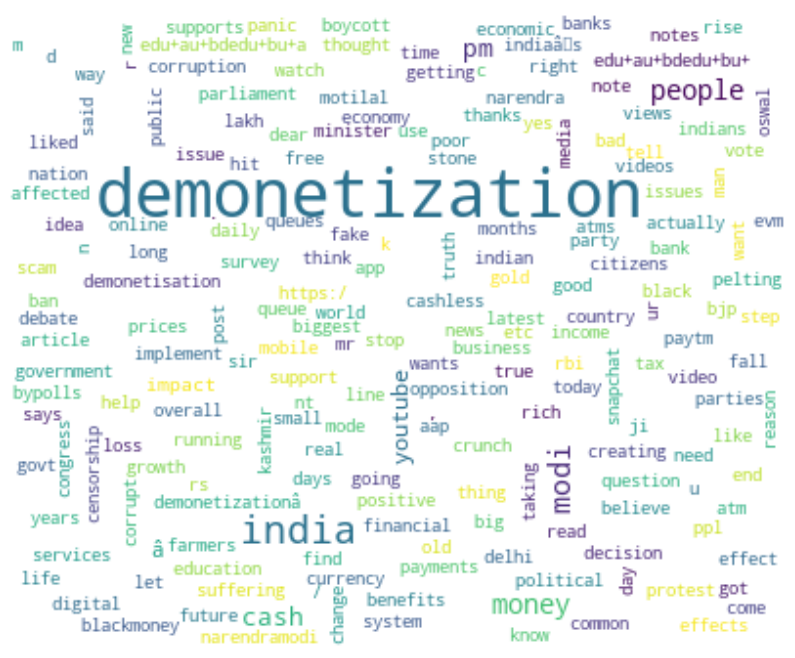

In [43]:
# Generating wordcloud
generate_wordcloud(word_freq)